In [1]:
from citipy import citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metrics"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['clouds']['all']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | lahore
Processing Record 3 of Set 1 | aswan
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | poronaysk
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | paso de los toros
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | kattivakkam
Processing Record 18 of Set 1 | flying fish cove
Processing Record 19 of Set 1 | krasnozerskoye
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | buka
Processing Record 38 of Set 4 | san luis de la loma
Processing Record 39 of Set 4 | maintirano
Processing Record 40 of Set 4 | pampierstad
Processing Record 41 of Set 4 | cassilandia
Processing Record 42 of Set 4 | belen
Processing Record 43 of Set 4 | susehri
Processing Record 44 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 45 of Set 4 | ipilan
Processing Record 46 of Set 4 | georgetown
Processing Record 47 of Set 4 | magong
Processing Record 48 of Set 4 | campos dos goytacazes
Processing Record 49 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 0 of Set 5 | xinyuan
Processing Record 1 of Set 5 | masterton
Processing Record 2 of Set 5 | susuman
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | qatana
Processing Record 5 of Set 5 | shenjiamen
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | takoradi
Processing Record 8 of Set 5 | la'ie
Processing Record 9 of 

Processing Record 29 of Set 8 | huocheng
City not found. Skipping...
Processing Record 30 of Set 8 | mournies
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | kailua-kona
Processing Record 35 of Set 8 | protaras
Processing Record 36 of Set 8 | juneau
Processing Record 37 of Set 8 | saint-philippe
Processing Record 38 of Set 8 | nadi
Processing Record 39 of Set 8 | goz beida
Processing Record 40 of Set 8 | dubinino
Processing Record 41 of Set 8 | dame-marie
Processing Record 42 of Set 8 | katsuura
Processing Record 43 of Set 8 | mayen abun
City not found. Skipping...
Processing Record 44 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 45 of Set 8 | basse-terre
Processing Record 46 of Set 8 | tokar
Processing Record 47 of Set 8 | turpan
Processing Record 48 of Set 8 | manta
Processing Record 49 of Set 8 | aden
Processing Record 0 of Set 9 | lospalos
Processin

Processing Record 20 of Set 12 | auki
Processing Record 21 of Set 12 | pryluky
Processing Record 22 of Set 12 | usinsk
Processing Record 23 of Set 12 | mhamid
Processing Record 24 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 25 of Set 12 | hoshangabad
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | ji'an
Processing Record 28 of Set 12 | cerasu
Processing Record 29 of Set 12 | howrah
Processing Record 30 of Set 12 | kurumkan
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | shetpe
Processing Record 33 of Set 12 | progreso
Processing Record 34 of Set 12 | sumenep
Processing Record 35 of Set 12 | fort bragg
Processing Record 36 of Set 12 | porto novo
Processing Record 37 of Set 12 | kataragama
City not found. Skipping...
Processing Record 38 of Set 12 | prachuap khiri khan
Processing Record 39 of Set 12 | quepos
Processing Record 40 of Set 12 | khost
Processing Record 41 of Set 12 | tongshan
Processing Record 

In [5]:
city_weather

{'coord': {'lon': 16.4901, 'lat': 13.6408},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 304.66,
  'feels_like': 304.9,
  'temp_min': 304.66,
  'temp_max': 304.66,
  'pressure': 1011,
  'humidity': 41,
  'sea_level': 1011,
  'grnd_level': 978},
 'visibility': 10000,
 'wind': {'speed': 3.11, 'deg': 210, 'gust': 5.02},
 'clouds': {'all': 70},
 'dt': 1688859035,
 'sys': {'country': 'TD', 'sunrise': 1688877138, 'sunset': 1688923540},
 'timezone': 3600,
 'id': 2427336,
 'name': 'Moussoro',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,299.44,40,40,5.66,CA,1688858570
1,lahore,31.5497,74.3436,297.21,100,100,6.69,PK,1688858596
2,aswan,24.0934,32.9070,304.76,0,0,2.57,EG,1688858869
3,hamilton,39.1834,-84.5333,298.70,75,75,1.54,US,1688858652
4,port-aux-francais,-49.3500,70.2167,274.17,98,98,5.49,TF,1688858857


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,299.44,40,40,5.66,CA,1688858570
1,lahore,31.5497,74.3436,297.21,100,100,6.69,PK,1688858596
2,aswan,24.0934,32.9070,304.76,0,0,2.57,EG,1688858869
3,hamilton,39.1834,-84.5333,298.70,75,75,1.54,US,1688858652
4,port-aux-francais,-49.3500,70.2167,274.17,98,98,5.49,TF,1688858857


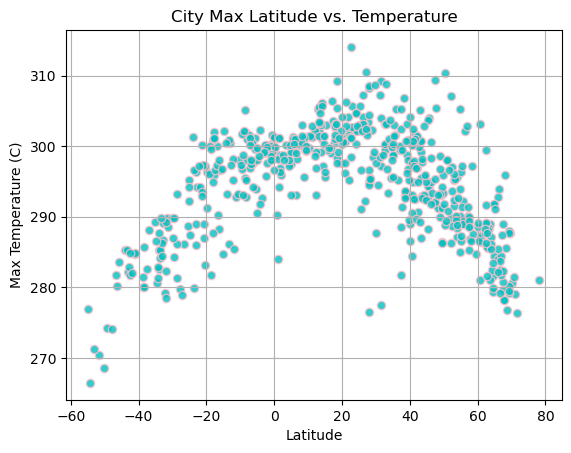

In [10]:
#Create the Scatter Plots Requested
#Latitude Vs. Temperature
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = 'c', edgecolor='pink', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

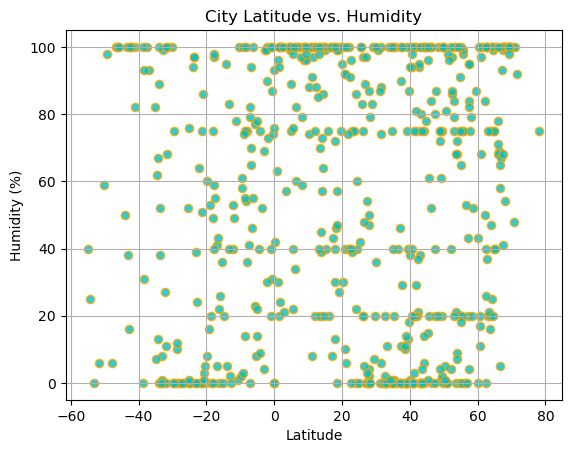

In [11]:
#Latitude vs Humidity
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='c', edgecolor = 'orange', alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

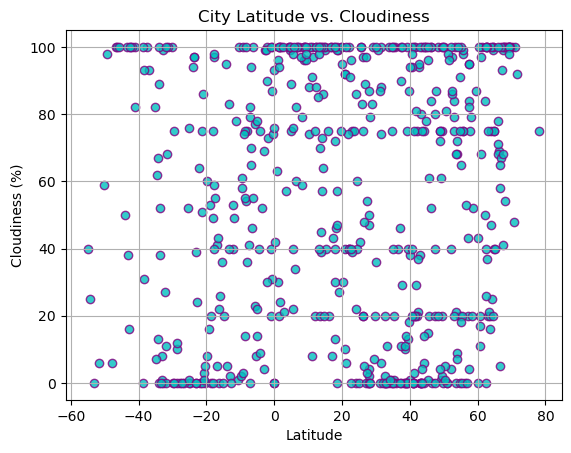

In [12]:
#Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='c', edgecolor= 'purple', alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

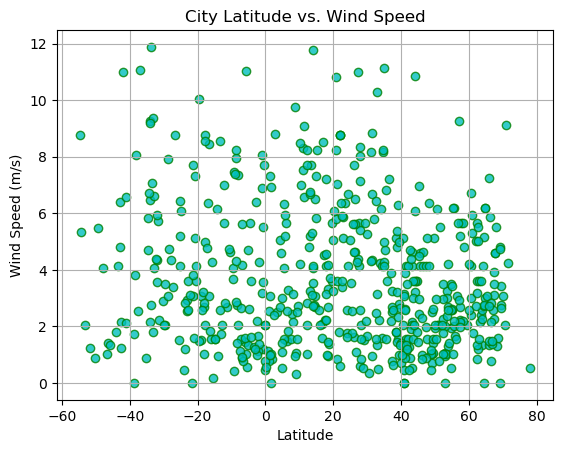

In [13]:
# Latitude vs. Wind Speed Plot
#Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='c', edgecolor= 'green', alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [36]:
#Requirement 2: Compute Linear Regression for Each Relationship
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2))+ "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="pink")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,299.44,40,40,5.66,CA,1688858570
1,lahore,31.5497,74.3436,297.21,100,100,6.69,PK,1688858596
2,aswan,24.0934,32.9070,304.76,0,0,2.57,EG,1688858869
3,hamilton,39.1834,-84.5333,298.70,75,75,1.54,US,1688858652
5,bilibino,68.0546,166.4372,295.90,54,54,5.51,RU,1688858845


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,274.17,98,98,5.49,TF,1688858857
6,grytviken,-54.2811,-36.5092,266.44,25,25,5.34,GS,1688858870
8,adamstown,-25.0660,-130.1015,295.20,76,76,6.42,PN,1688858870
9,paso de los toros,-32.8167,-56.5167,286.71,99,99,4.05,UY,1688858871
10,edinburgh of the seven seas,-37.0676,-12.3116,288.11,93,93,11.08,SH,1688858871
13,port mathurin,-19.6833,63.4167,296.30,60,60,10.04,MU,1688858872
14,puerto natales,-51.7236,-72.4875,270.39,6,6,1.23,CL,1688858872
15,papatowai,-46.5619,169.4708,281.68,100,100,1.02,NZ,1688858872
17,flying fish cove,-10.4217,105.6791,297.97,100,100,4.63,CX,1688858872


The r-value is: 0.42792112520279024


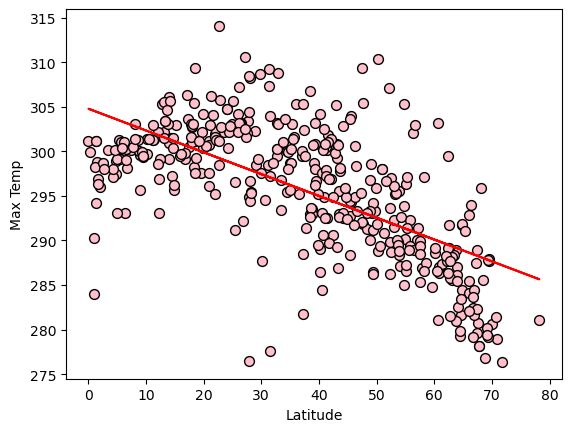

In [39]:
#Temperature vs. Latitude Linear Regression Plot
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Max Temp", (6, -10), "pink")

The r-value is: 0.6876576072038383


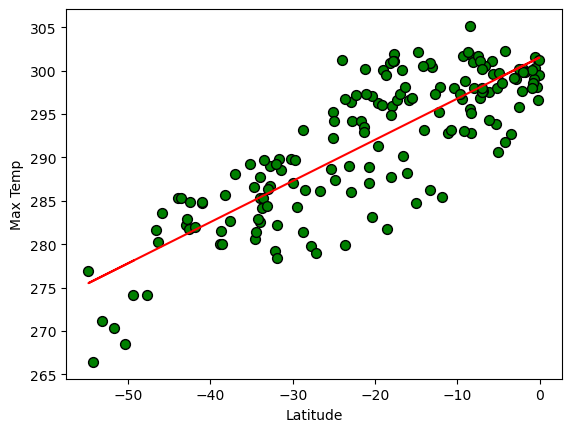

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Max Temp", (6, -10), "green")

DISCUSSION ABOUT LINEAR RELATIONSHIP
Temperature and Latitude in the Northern Hemisphere have a correlation of 0.43, a weak correlation. Temperature and Latitude in the Southern Hemisphere have a correlation of 0.70, a strong correlation. Both correlations lead us to think that there is a statistical association between both temperature and latitude in the southern hemisphere. 

The r-value is: 0.0038171622561582433


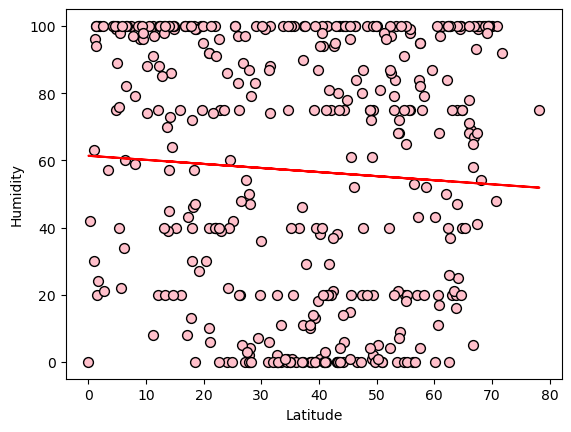

In [41]:
#Hmidity vs. Latitude Linear Regression Plot
#Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,"Humidity", (6, -10), "pink")

The r-value is: 0.00048282217435567946


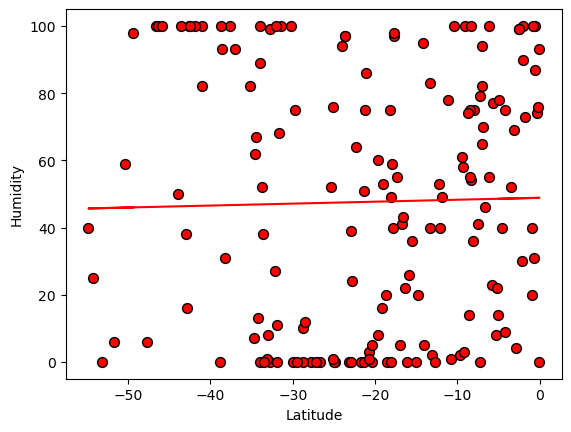

In [42]:
#Humidity vs. Latitude Linear Regression Plot
#Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,"Humidity", (50, -16), "red")

Because of the low R values, there  is a weak relationship between latitude and humidity in both the Northern and Southern Hemisphere. 

The r-value is: 0.0038171622561582433


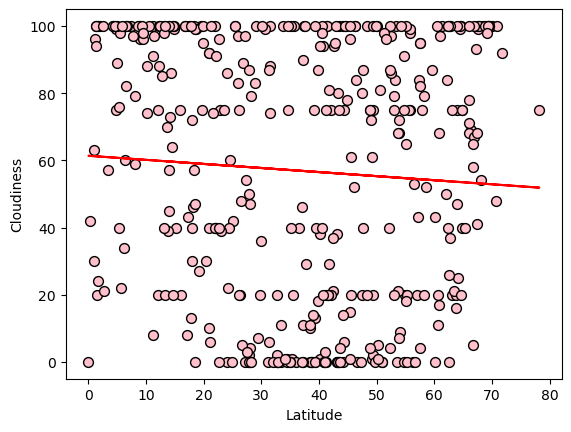

In [43]:
 #Wind Speed vs. Latitude Linear Regression Plot
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,"Cloudiness", (6, -10), "pink")

The r-value is: 0.00048282217435567946


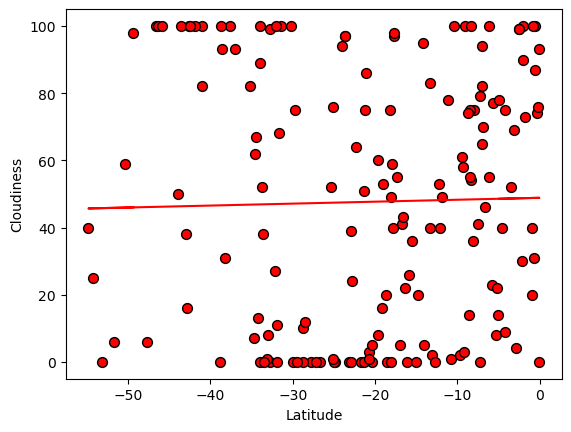

In [44]:
 #Wind Speed vs. Latitude Linear Regression Plot
 # Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,"Cloudiness", (50, -50), "red")

Discussion about the linear relationship:Because of the low R values, Latitude and cloudiness in both Southern and Northern hemispheres have a weak correlation.

The r-value is: 0.028452551571652523


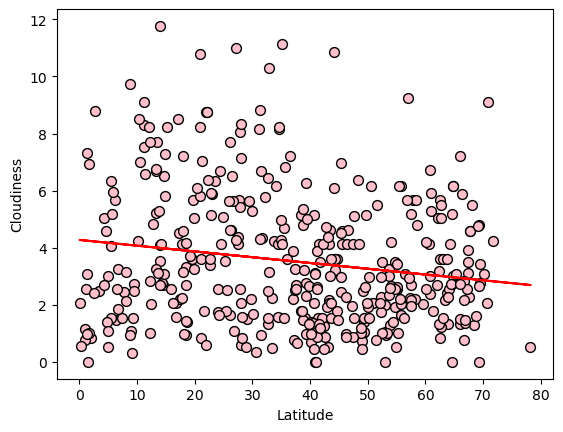

In [45]:
#Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,"Cloudiness", (50, -20), "pink")

The r-value is: 0.018847153215504404


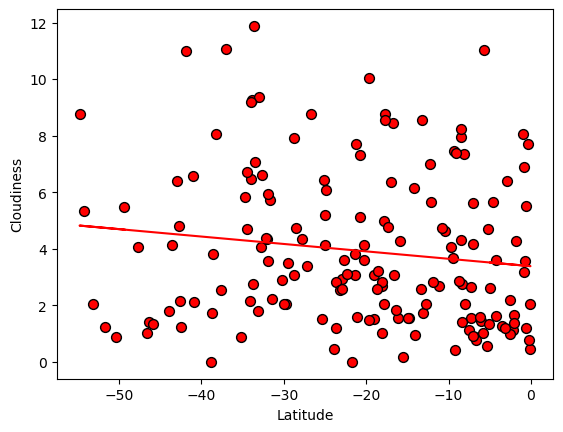

In [46]:
#Wind Speed vs. Latitude Linear Regression Plot
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,"Cloudiness", (50, -25), "red")

Discussion about the linear relationship: Because of the low R values, Latitude and Wind speed in both Southern and Northern hemispheres have a weak correlation.